# Statystyki wyścigowe w Formule 1


**Conspect:**
- Cel: Project showing basic F1 statistics and allows the user to enter data and process it.
- <a href="https://www.kaggle.com/datasets/rohanrao/formula-1-world-championship-1950-2020">Kaggle dataset</a>


**Data Description**

The data used for this project is a dataset on *Formula 1 World Championship from 1950 to 2020*, which was obtained from *Kaggle*.
The dataset includes information on every race, driver, results and the circuits.

**Project Description**

The goal of this project is to create a program that displays basic Formula 1 statistics and allows the user to enter and process data.
To achieve this, we will be using the previously mentioned *Formula 1 World Championship* dataset from *Kaggle*.
The program will allow the user to view statistics such as driver and team standings, race winners or lap records. 
Additionally, the program will allow the user to enter their own data, such as lap times and race results, and process it to generate customized statistics and insights.

***This program can be useful for Formula 1 enthusiasts who want to explore and analyze the sport's data in an interactive way.***




# Import potrzebnych bibliotek

In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Wczytanie plików

In [3]:
# ścieżka do folderu z plikami CSV
data_path = r'C:\Users\natal\Desktop\my projects\Formula 1'

In [7]:
drivers = pd.read_csv('drivers.csv')
races = pd.read_csv('races.csv')
results = pd.read_csv('results.csv')
status = pd.read_csv('status.csv')

# Czyszczenie danych

In [8]:
#    drivers.drop(columns=['url', 'code'], inplace=True)
#    results.drop(columns=['fastestLap', 'constructorId', 'rank', 'fastestLapTime', 'fastestLapSpeed'], inplace=True)
#    # Łączenie plików
#    results = results.merge(drivers[['driverId', 'surname', 'forename','dob', 'nationality']], on='driverId')
#    results = results.merge(status, on='statusId')
#    circuits.drop(columns=['url', 'location', 'circuitRef', 'country', 'lat', 'lng', 'alt'], inplace=True)
#    races.drop(columns=['url', 'time', 'fp1_date', 'fp1_time','fp2_date','fp2_time','fp3_date','fp3_time','quali_date','quali_time','sprint_date','sprint_time'], inplace=True)
#    races = races.merge(circuits[['circuitId', 'name']], on='circuitId', how='left', suffixes=('_race', '_circuit'))
#    races = races[['raceId', 'year', 'round', 'name_race', 'date', 'circuitId', 'name_circuit']]

#    results.to_csv('results.csv', index=False) # Zapisanie do pliku
#    races.to_csv('races.csv', index=False)

# EDA - podstawowe statystyki

In [9]:
results.describe()

,resultId,raceId,driverId,grid,positionOrder,points,laps,statusId
count,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000,25840.000000
mean,12921.334327,531.425813,261.732082,11.179063,12.876006,1.877053,45.977515,17.568692
std,7460.682031,299.440908,268.623016,7.243725,7.712391,4.169849,29.808951,26.155476
min,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,6460.750000,293.000000,56.000000,5.000000,6.000000,0.000000,22.000000,1.000000
50%,12920.500000,514.000000,163.000000,11.000000,12.000000,0.000000,52.000000,11.000000
75%,19380.250000,784.000000,360.000000,17.000000,18.000000,2.000000,66.000000,14.000000
max,25845.000000,1096.000000,856.000000,34.000000,39.000000,50.000000,200.000000,141.000000


In [10]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25840 entries, 0 to 25839
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   resultId       25840 non-null  int64  
 1   raceId         25840 non-null  int64  
 2   driverId       25840 non-null  int64  
 3   number         25840 non-null  object 
 4   grid           25840 non-null  int64  
 5   position       25840 non-null  object 
 6   positionText   25840 non-null  object 
 7   positionOrder  25840 non-null  int64  
 8   points         25840 non-null  float64
 9   laps           25840 non-null  int64  
 10  time           25840 non-null  object 
 11  milliseconds   25840 non-null  object 
 12  statusId       25840 non-null  int64  
 13  surname        25840 non-null  object 
 14  forename       25840 non-null  object 
 15  dob            25840 non-null  object 
 16  nationality    25840 non-null  object 
 17  status         25840 non-null  object 
dtypes: flo

In [11]:
races.describe()

,raceId,year,round,circuitId
count,1102.000000,1102.000000,1102.000000,1102.000000
mean,553.853902,1992.049002,8.507260,23.697822
std,321.706151,20.308639,5.097545,19.337398
min,1.000000,1950.000000,1.000000,1.000000
25%,276.250000,1976.000000,4.000000,9.000000
50%,551.500000,1994.000000,8.000000,18.000000
75%,826.750000,2010.000000,12.000000,34.000000
max,1120.000000,2023.000000,23.000000,80.000000


In [12]:
races.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1102 entries, 0 to 1101
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   raceId        1102 non-null   int64 
 1   year          1102 non-null   int64 
 2   round         1102 non-null   int64 
 3   name_race     1102 non-null   object
 4   date          1102 non-null   object
 5   circuitId     1102 non-null   int64 
 6   name_circuit  1102 non-null   object
dtypes: int64(4), object(3)
memory usage: 60.4+ KB


# Wizualizacje danych

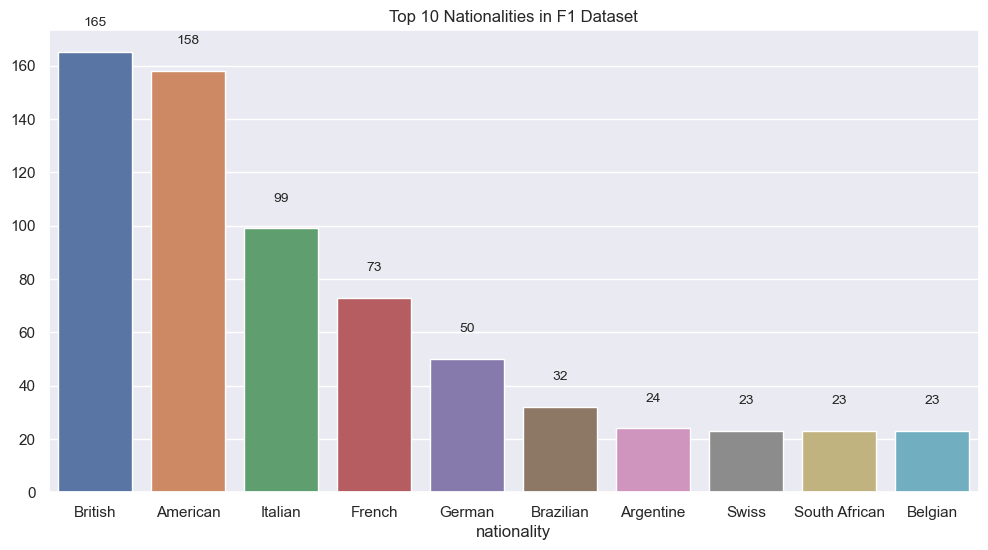

In [13]:
# wizualizacja rozkładu kolumny 'nationality'

nationality_counts = drivers.groupby("nationality").size()
sorted_nationalities = nationality_counts.sort_values(ascending=False)
sns.set(style="darkgrid")
plt.figure(figsize=(12, 6))
ax = sns.barplot(x=sorted_nationalities.index[:10], y=sorted_nationalities.values[:10])
ax.set_title("Top 10 Nationalities in F1 Dataset")


for i, v in enumerate(sorted_nationalities.values[:10]):
    ax.text(i, v + 10, str(v), ha='center', fontsize=10)


plt.show()

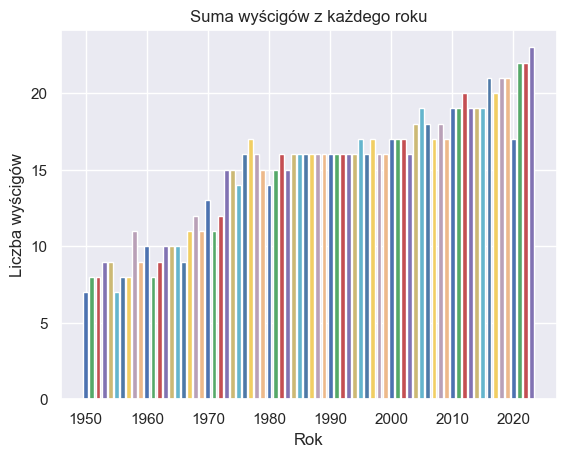

In [14]:
races['year'] = pd.to_datetime(races['date']).dt.year # Wyodrębnienie roku z daty wyścigu

year_counts = races['year'].value_counts().sort_index() # Sumowanie liczby wyścigów dla każdego roku

colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B2', '#CCB974', '#64B5CD', '#4E79A7', '#F1CE63', '#B9A0B7', '#EDB98A'] # Kolory dla wykresu

plt.bar(year_counts.index, year_counts.values, color=colors)
plt.title('Suma wyścigów z każdego roku')
plt.xlabel('Rok')
plt.ylabel('Liczba wyścigów')
plt.show()

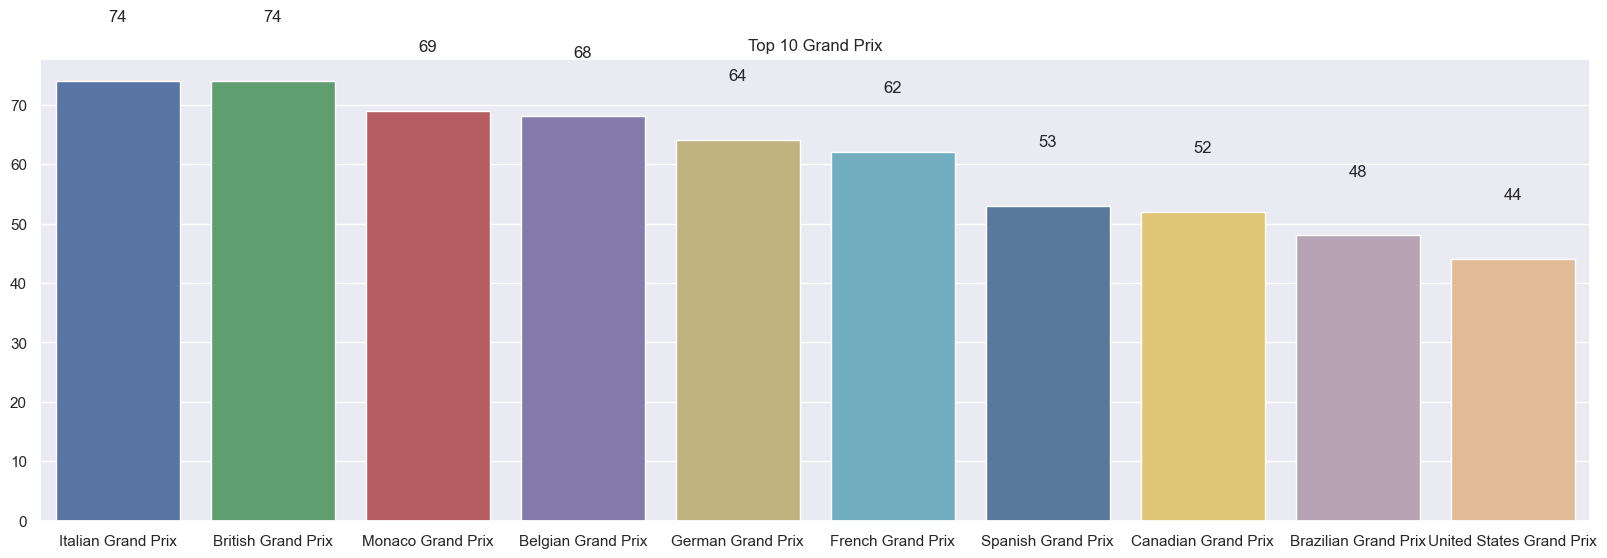

In [ ]:
top10GP = races['name_race'].value_counts()[:10]

sns.set(style="darkgrid")
plt.figure(figsize=(20, 6))
ax = sns.barplot(x=top10GP.index, y=top10GP.values, palette=colors)
ax.set_title("Top 10 najczęściej odbytych Grand Prix")

for i, v in enumerate(top10GP.values):
    ax.text(i, v + 10, str(v), ha='center', fontsize=12)

plt.show()

In [16]:
# Zliczenie statusów i wyświetlenie 10 najczęściej występujących
status_counts = results['status'].value_counts().head(10)
status_counts

Finished           7083
+1 Lap             3850
Engine             2011
+2 Laps            1593
Accident           1044
Did not qualify    1025
Collision           833
Gearbox             805
Spun off            792
+3 Laps             731
Name: status, dtype: int64

# Program pozwalający użytkownikowi na wprowadzenie danych kierowcy i uzyskanie odpowiedzi

In [19]:
nazwisko = input("Wprowadź nazwisko kierowcy, którego ID chcesz znaleźć: ")

kierowcaId = ""

for i, driver in results.iterrows():
    if driver['surname'].lower() == nazwisko.lower():
        kierowcaId = driver['driverId']
        kierowcaDOB = driver['dob']
        break

if kierowcaId:
    print(f"ID kierowcy o nazwisku {nazwisko} to {kierowcaId}")
else:
    print(f"Nie znaleziono kierowcy o nazwisku {nazwisko}")
from datetime import datetime

today = datetime.today()
birthdate = datetime.strptime(kierowcaDOB, '%Y-%m-%d')
age = today.year - birthdate.year - ((today.month, today.day) < (birthdate.month, birthdate.day))

print(f"Wiek kierowcy to {age}")

licznik = 0
for index, row in results.iterrows():
    if row['driverId'] == kierowcaId and row['position'] == "1":
        licznik += 1

print(f'Ilość wygranych wyścigów: {licznik}')

if licznik > 0:
    dfw = pd.to_datetime('2023-05-05') # data bazowa

    for index, row in results.iterrows():
        if row['driverId'] == kierowcaId and row['position'] == "1":
            race_id = row['raceId']
            race_date = races.loc[races['raceId'] == race_id, 'date'].values[0]
            race_date = pd.to_datetime(race_date)
            if race_date < dfw:
                dfw = race_date

    print(f'Data pierwszej wygranej kierowcy: {dfw.date()}')
else:
    print(f'kierowca nie wygrał zednego wyscigu')

ID kierowcy o nazwisku vettel to 20
Wiek kierowcy to 35
Ilość wygranych wyścigów: 53
Data pierwszej wygranej kierowcy: 2008-09-14
